

---


**Trabajo Práctico Final -  Grupo n° 5 - Archivo N° 1 : EDA + ML**


Universidad Tecnológica Nacional, Buenos Aires


Ingeniería Industrial


Ciencia de Datos - Curso I5521


---


**Integrantes:**

Nombre: Leandro Omelanchuc

Legajo: 172880-5


Nombre: Franco Vanella

Legajo: 166394-0


---




## **Objetivos del archivo**
- EDA de Dataset provisto
- Generar un modelo de aprendizaje capaz de predecir la variable "Suscription" de del dataset dado

---
## **Descripcion de Variables**


Formato --> "Variable : Significado"

*   age : Edad del cliente
*   job : Tipo de empleo del cliente
*   martial status : Estado civil
*   education : Educacion maxima alcanzada por el cliente
*   Credit : Si tiene deuda de crédito o no
*   balance : Promedio de saldo en la cuenta en el año
*   housing loan : Si tiene prestamos hipotecrios o no
*   Persona loan : Si tiene prestamos o no
*   contact : tipo con contacto del cliente
*   Last Contact Day : Ultimo dia de contacto con el cliente en el mes
*   Last Contact Month : Ultimo mes de contacto con el cliente en el año
*   Last Contact Duration : Duracion del ultimo contacto con el cliente medido en segundos
*   campaign : Cantidad de contactos al cliente durante esta campania, incluye el último contacto.
*   pdays : Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo
*   previous : Cantidad de contactos previos a esta campania para cada cliente
*   poutcome : Performance de la campania de marketing anterior para este cliente
---

























In [ ]:
## Importo librerías EDA ##


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Upload Dataset Original ##


Archivo = "bank_subscription.csv"
df_clients = pd.read_csv("bank_subscription.csv", sep=";", na_values=[])
df_clients.head()




,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


---
**Limpieza de Dataset**

Eliminamos aquellas lineas con datos no validos, null's o inconsistentes con los valores aceptados para esas features


---


In [ ]:
## Verificacion de nulls y formatos en las columnas ##

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [ ]:
## Verificacion de valores NaN en las columnas ##

df_clients.isna().sum()

,0
Age,4973
Job,4973
Marital Status,4973
Education,4973
Credit,4973
Balance (euros),4973
Housing Loan,7686
Personal Loan,7686
Contact,0
Last Contact Day,0


In [ ]:
(df_clients == 'unknown').sum()


,0
Age,0
Job,257
Marital Status,0
Education,1666
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,13020
Last Contact Day,0


 *Segun mi conclusion, no deberia eliminarse los valores NaN ya que se eliminan aproxiamdamente un 76% del dataset pudiendo perder capacidad informativa si eliminamos demasiado.
 Por lo que Reemplazo los valores NaN. Para las varibales numericas con su mediana, Para las Variables Categoricas con su Moda y para la variable binaria asumo como "no".

In [ ]:


# === 1. Copia de trabajo ===
df = df_clients.copy()

# === 2. IMPUTACIÓN NUMÉRICA (mediana) ===
num_cols = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Pdays']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# === 3. IMPUTACIÓN CATEGÓRICA (moda) ===
cat_cols = ['Job', 'Marital Status', 'Education']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# === 4. IMPUTACIÓN DE VARIABLES BINARIAS (asumir "no") ===
df['Housing Loan'] = df['Housing Loan'].fillna('no')
df['Personal Loan'] = df['Personal Loan'].fillna('no')
df['Credit'] = df['Credit'].fillna('no')
# === 5. Verificar imputación ===
print("\nCantidad de NaN después de imputar:")
print(df.isna().sum())

df_eda = df.copy()
df_eda.shape
df_eda.head()


Cantidad de NaN después de imputar:
Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64


,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,blue-collar,married,secondary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,448.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0
3,47.0,blue-collar,married,unknown,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,180.0,1,-1.0,0,unknown,0


---
**Valicacion de datos por feature**

Se verifica qué valores toman los datos refinados para su parametrizacion o separacion binaria por feature categorica


---

In [ ]:
## Validacion de valores por features ##

Features_Dataset = df_eda.columns.to_list()

Features_Dataset

['Age',
 'Job',
 'Marital Status',
 'Education',
 'Credit',
 'Balance (euros)',
 'Housing Loan',
 'Personal Loan',
 'Contact',
 'Last Contact Day',
 'Last Contact Month',
 'Last Contact Duration',
 'Campaign',
 'Pdays',
 'Previous',
 'Poutcome',
 'Subscription']

In [ ]:
## verificacion de valores ##

for feature in Features_Dataset:
  print(feature)
  print(df_eda[feature].unique())

Age
[58. 44. 33. 47. 35. 28. 42. 43. 41. 29. 53. 57. 51. 45. 60. 56. 32. 25.
 40. 39. 52. 36. 49. 59. 37. 50. 54. 55. 48. 24. 38. 46. 30. 34. 31. 23.
 26. 61. 22. 27. 21. 20. 66. 62. 83. 75. 67. 70. 65. 68. 64. 72. 71. 19.
 76. 69. 85. 63. 90. 82. 73. 74. 78. 80. 94. 79. 77. 95. 81. 18. 89. 84.
 86. 87. 92. 93. 88.]
Job
['blue-collar' 'technician' 'entrepreneur' 'unknown' 'management'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital Status
['married' 'single' 'divorced']
Education
['secondary' 'unknown' 'tertiary' 'primary']
Credit
['no' 'yes']
Balance (euros)
[2.1430e+03 4.4800e+02 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
Housing Loan
['yes' 'no']
Personal Loan
['no' 'yes']
Contact
['unknown' 'cellular' 'telephone']
Last Contact Day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Last Contact Month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Last Contact Dur

In [ ]:
cat_cols = df_eda.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nTop valores por columnas categóricas:")
for c in cat_cols:
    print(f"\n{c}:")
    print(df_eda[c].value_counts().head(10))


Top valores por columnas categóricas:

Job:
Job
blue-collar      13680
management        8394
technician        6748
admin.            4598
services          3700
retired           2000
self-employed     1414
entrepreneur      1315
unemployed        1171
housemaid         1107
Name: count, dtype: int64

Marital Status:
Marital Status
married     29195
single      11396
divorced     4620
Name: count, dtype: int64

Education:
Education
secondary    25618
tertiary     11830
primary       6097
unknown       1666
Name: count, dtype: int64

Credit:
Credit
no     44484
yes      727
Name: count, dtype: int64

Housing Loan:
Housing Loan
no     24394
yes    20817
Name: count, dtype: int64

Personal Loan:
Personal Loan
no     39222
yes     5989
Name: count, dtype: int64

Contact:
Contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Last Contact Month:
Last Contact Month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     26

Subscription
0    39922
1     5289
Name: count, dtype: int64

Distribución relativa:
Subscription
0    0.883015
1    0.116985
Name: proportion, dtype: float64


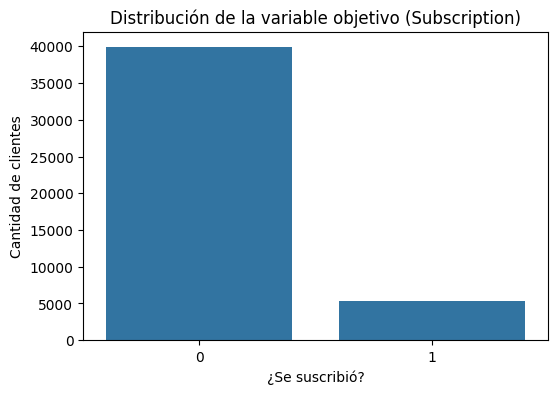

In [ ]:
print(df_eda['Subscription'].value_counts())
print("\nDistribución relativa:")
print(df_eda['Subscription'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='Subscription')
plt.title("Distribución de la variable objetivo (Subscription)")
plt.xlabel("¿Se suscribió?")
plt.ylabel("Cantidad de clientes")
plt.show()

Dado que está MUY desbalanceado, tomo nota para modelado futuro:

*Usar ROC-AUC

*Evitar "accuracy" como métrica ya que si tengo un modelo que predice solamente que una persona no se sucribe (modelo absurdo) tendría un acurracy del 88%

*Aplicar técnicas de balanceo (SMOTE, class weight, etc.)

CONCLUSION: La variable objetivo está muy desbalanceada.

In [ ]:
df_eda[['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']].describe()




,Age,Balance (euros),Last Contact Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.717502,1266.051558,245.164274,2.763841,33.046935,0.580323
std,10.048064,2919.353481,236.735702,3.098021,92.153948,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,105.000000,118.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,47.000000,1232.500000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


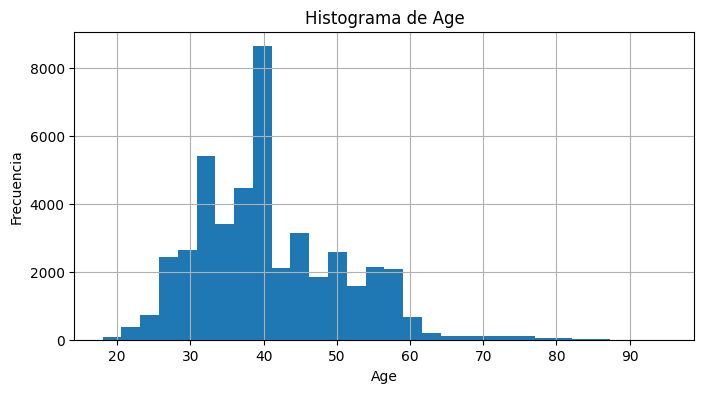

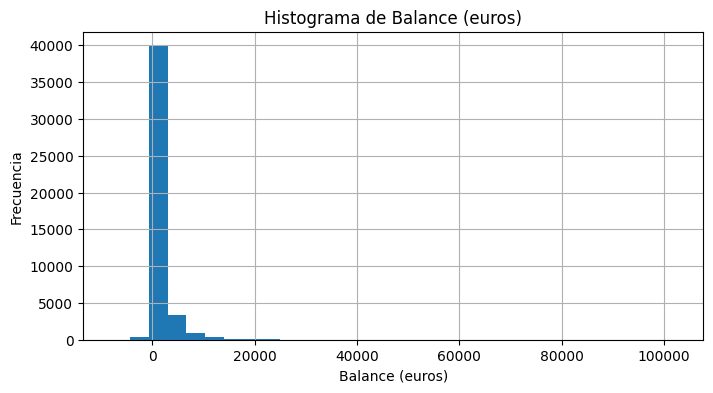

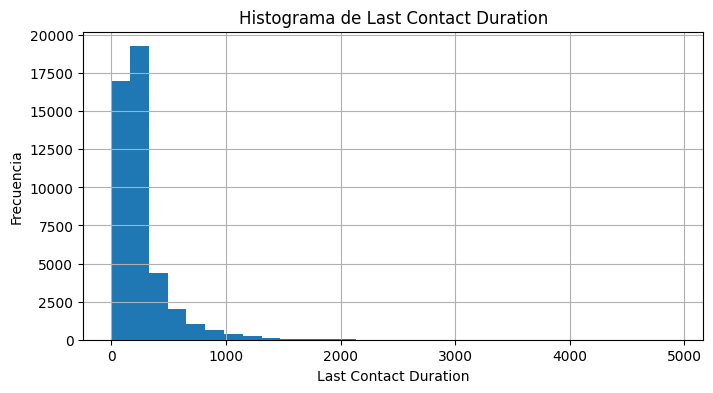

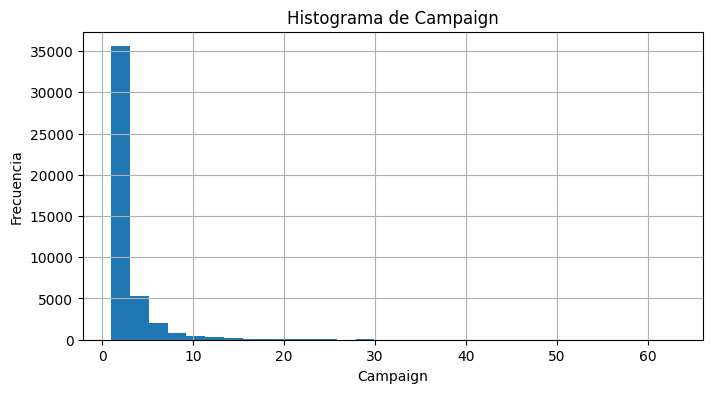

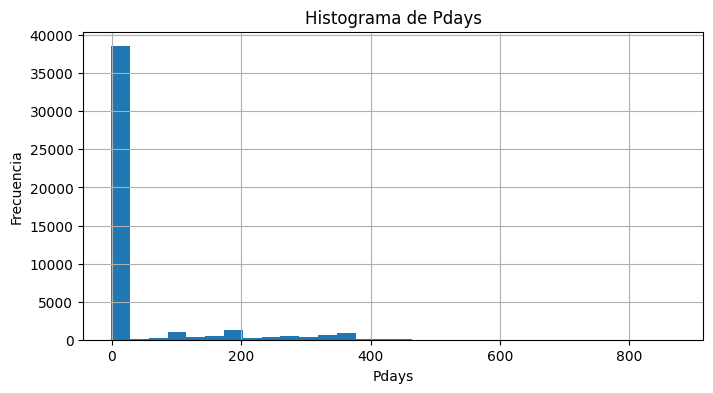

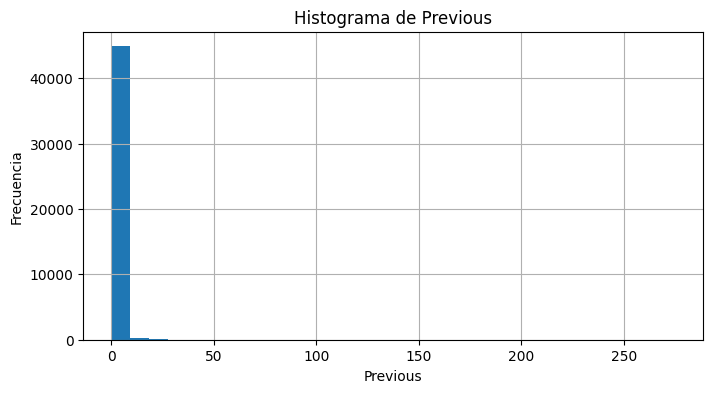

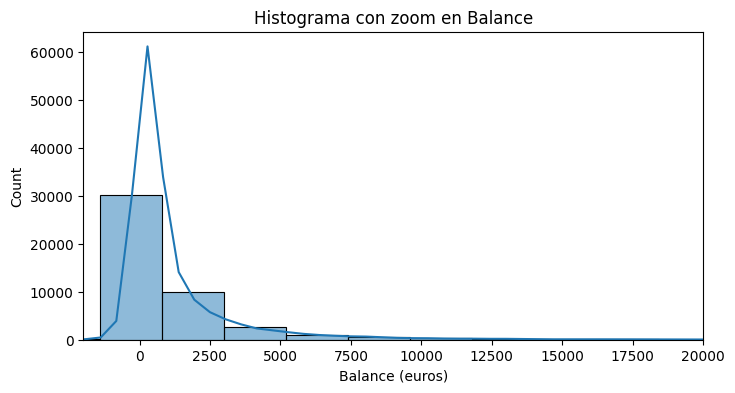

In [ ]:

num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

for col in num_cols:
    plt.figure(figsize=(8,4))
    df_eda[col].hist(bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df_eda['Balance (euros)'], bins=50, kde=True)
plt.xlim(-2000, 20000)  # Zoom sobre esta región
plt.title("Histograma con zoom en Balance")
plt.show()





Se puede observar lo siguiente:
*La variable Age tiene diferentes picos u olas con una media de 40 años.
*La variable pDays tiene un pico gigante en -1
*La variable Campaign tiene la mayoria de los valores en 1-5
*La variable Balance muy sesgada hacia la derecha
*La variable Previous en su mayoria esta en 0.
*La mayoria de las llamadas tienen poca duración



/tmp/ipython-input-2059431789.py:21: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)
/tmp/ipython-input-2059431789.py:21: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_bound, upper_bound)


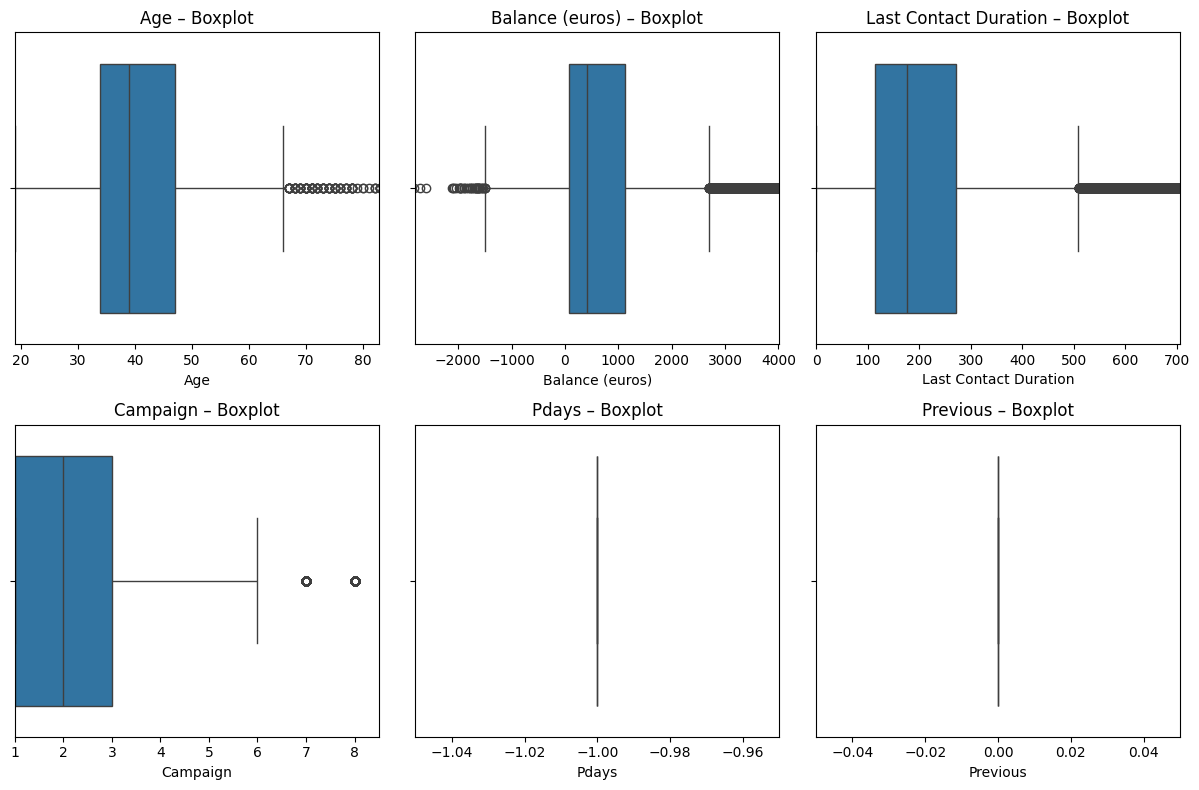

In [ ]:
#Boxplot Comparativo
num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_eda[col])
    plt.title(f"{col} – Boxplot")


## Modificacion de escala de graficos
    # Calculamos los cuartiles para centrar el grafico
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    # Seteamos los limites superiores e inferiores simetricos para la escala

    lower_bound = max(df_eda[col].min(), Q1 - 2.75 * IQR)
    upper_bound = min(df_eda[col].max(), Q3 + 2.75 * IQR)
    plt.xlim(lower_bound, upper_bound)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1171869397.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(lower_bound, upper_bound)
/tmp/ipython-input-1171869397.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(lower_bound, upper_bound)


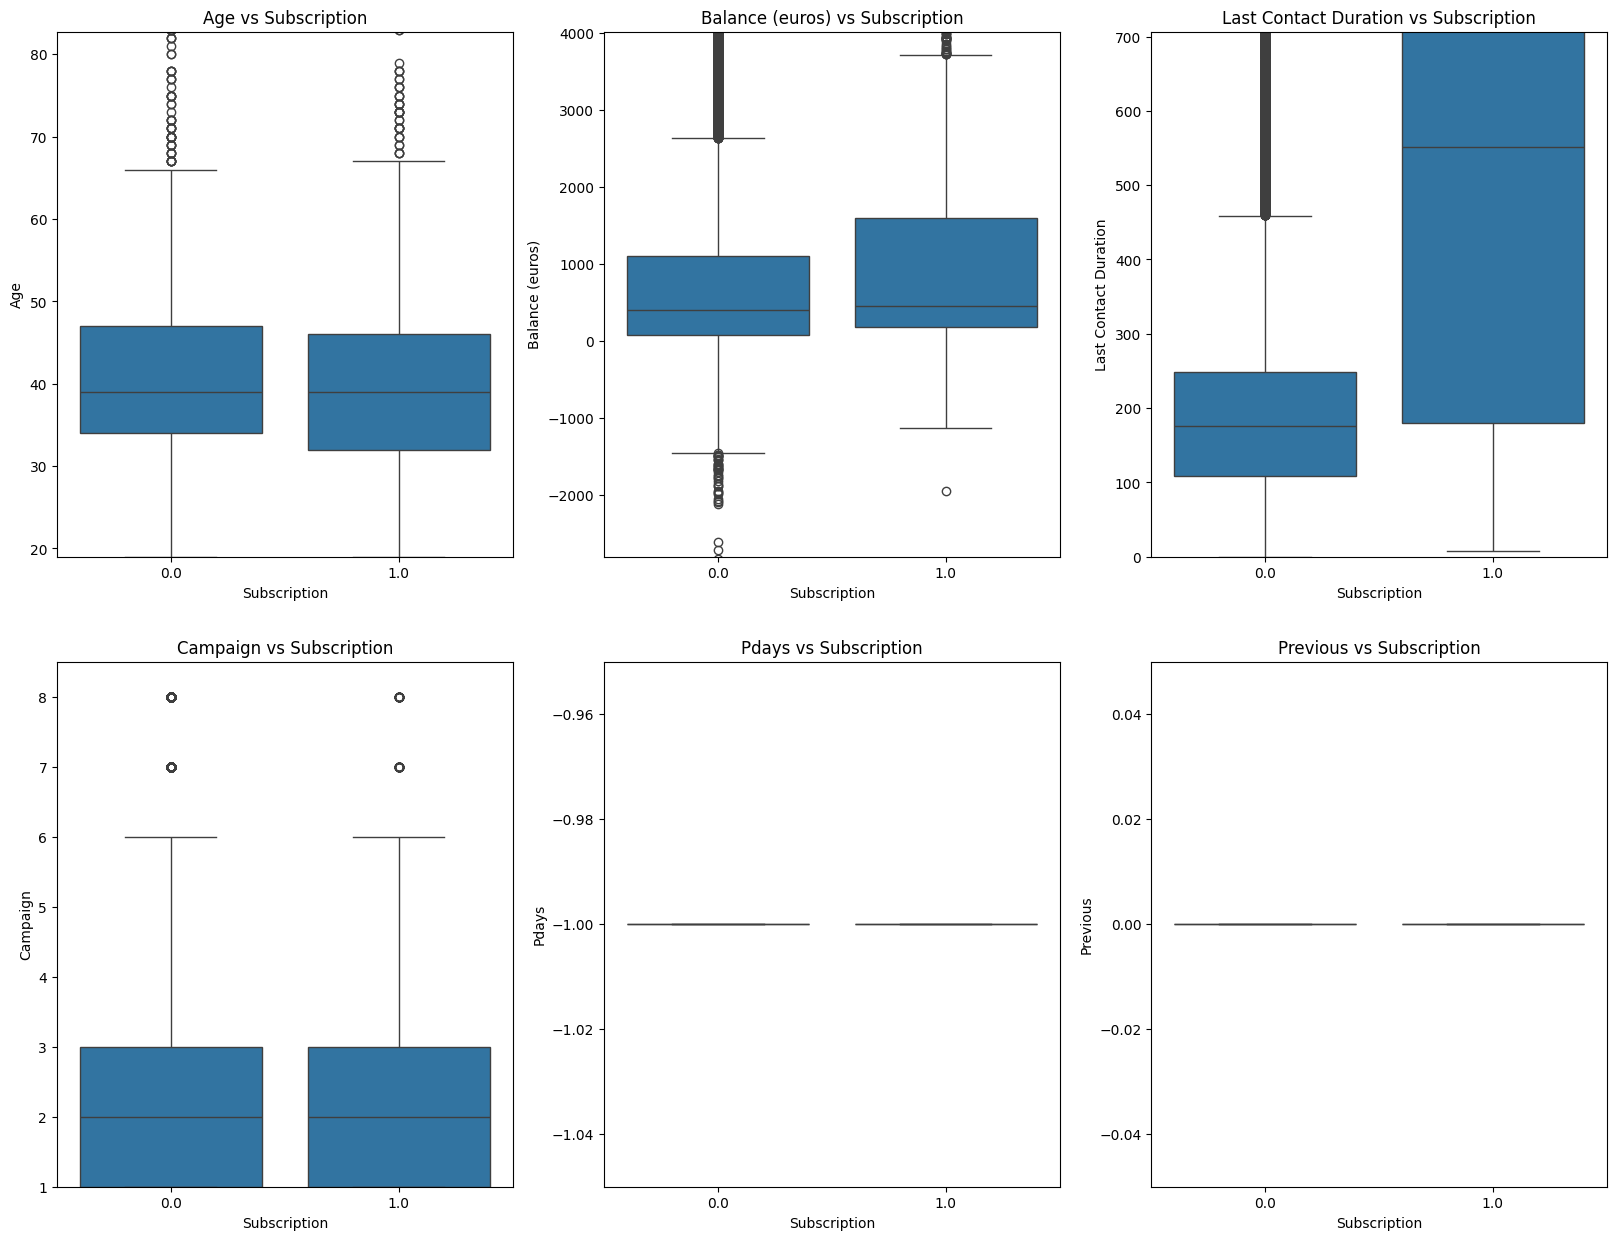

In [ ]:
#Boxplot Comparativo
num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_eda, x='Subscription', y=col)
    plt.title(f"{col} vs Subscription")

    # Calculamos los cuartiles para centrar el grafico
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1


    # Seteamos los limites superiores e inferiores simetricos para la escala
    lower_bound = max(df_eda[col].min(), Q1 - 2.75 * IQR)
    upper_bound = min(df_eda[col].max(), Q3 + 2.75 * IQR)

    plt.ylim(lower_bound, upper_bound)

plt.show()

Observando los graficos comparativos, en principio la variable mas predictiva es la "Last Contact Duration" donde las llamadas de mayor duracion aumentan la porpabilidad de suscribirse. Sin embargo esta variable generera data leakage ya que se conoce despues del contacto por lo que en campañas reales no deberia usarla para predecir antes de llamar.

*Los clientes con Balance mas alto tiende a suscribirse, pero tiene altos outliers.

*Los que fueron contactados hace poco, tienen mayor tasa de suscripcion, pero la relacion es ruidosa ya que hay muchos con valor -1 (Pdays).

*La variable Previous aporta poca informacion.

*Cuanto mas contactos le hicieron al cliente, puede haber una menor probabilidad de subscripicon (Campaign)

In [ ]:
df_eda.groupby("Subscription")[num_cols].mean()


,Age,Balance (euros),Last Contact Duration,Campaign,Pdays,Previous
Subscription,,,,,,
0,40.627173,1214.731677,214.078027,2.846350,30.077050,0.502154
1,41.399319,1653.420117,479.806958,2.141047,55.463982,1.170354


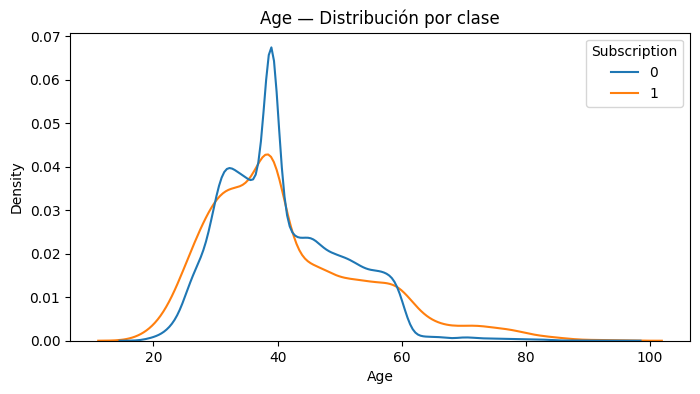

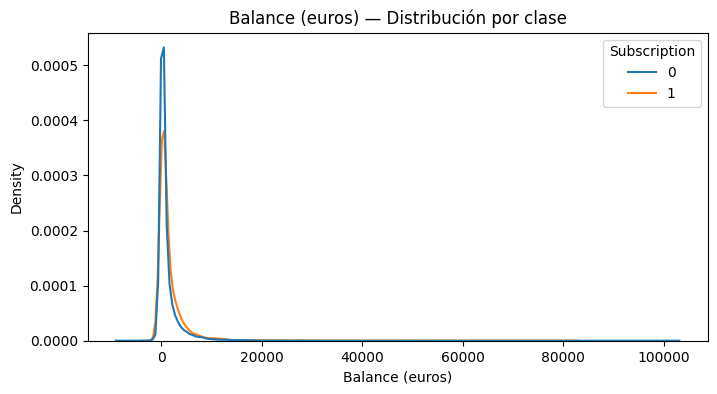

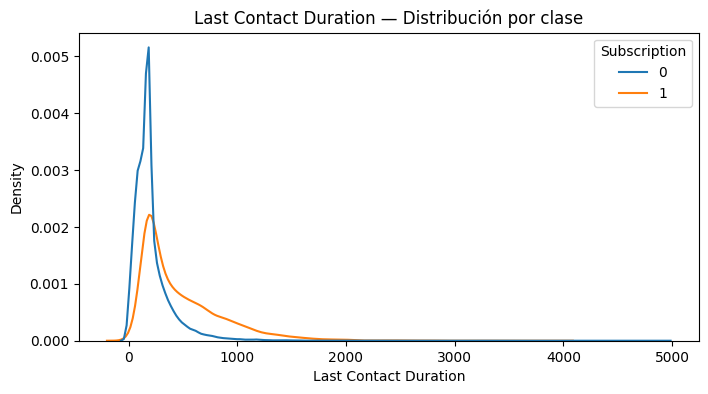

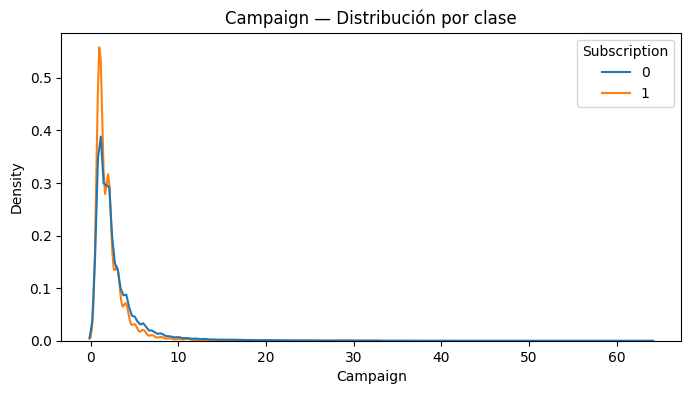

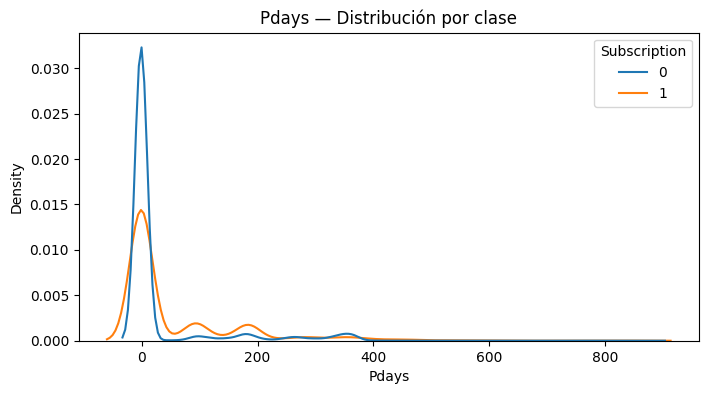

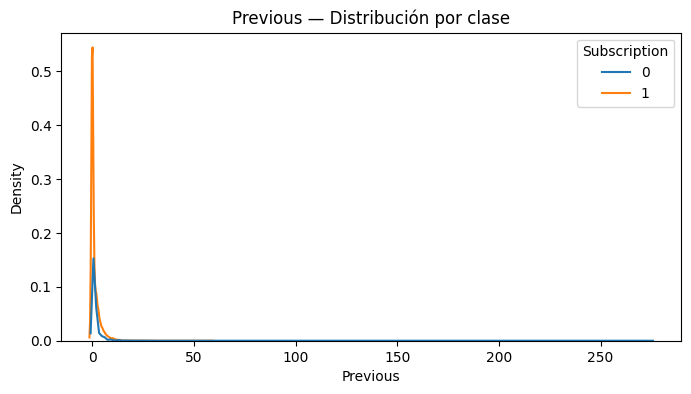

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df_eda, x=col, hue='Subscription', common_norm=False)
    plt.title(f"{col} — Distribución por clase")
    plt.show()


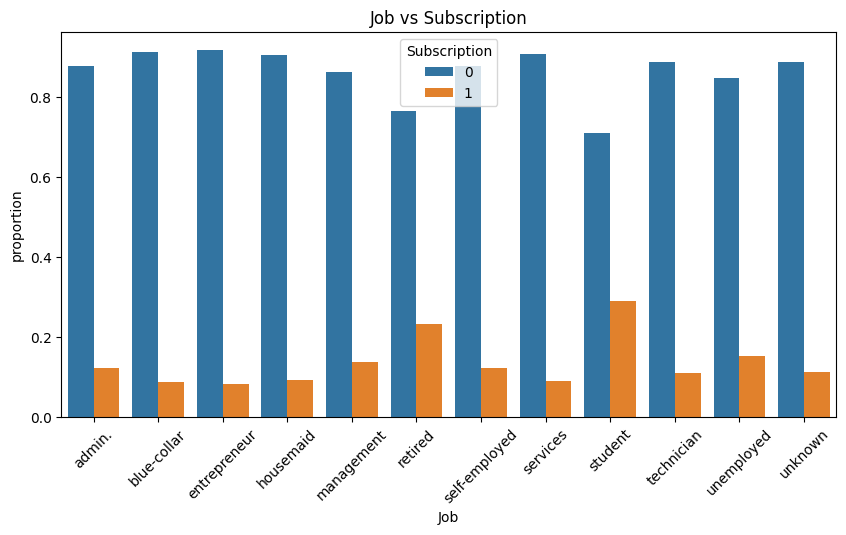

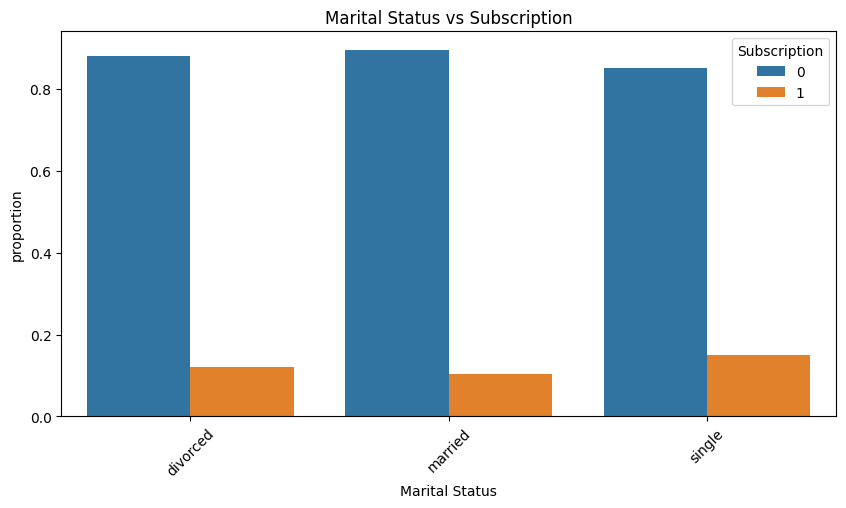

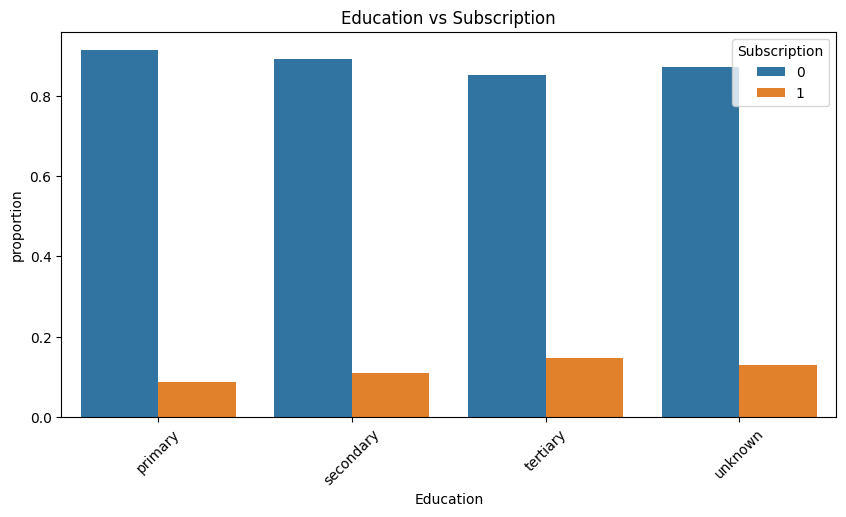

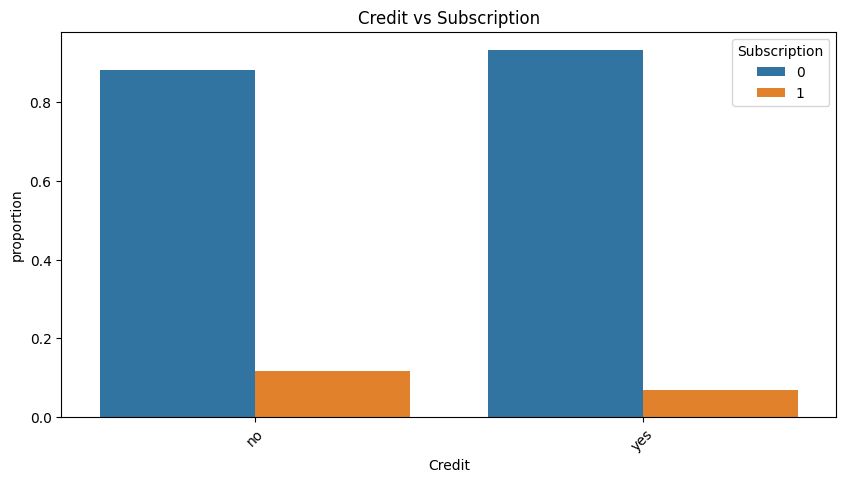

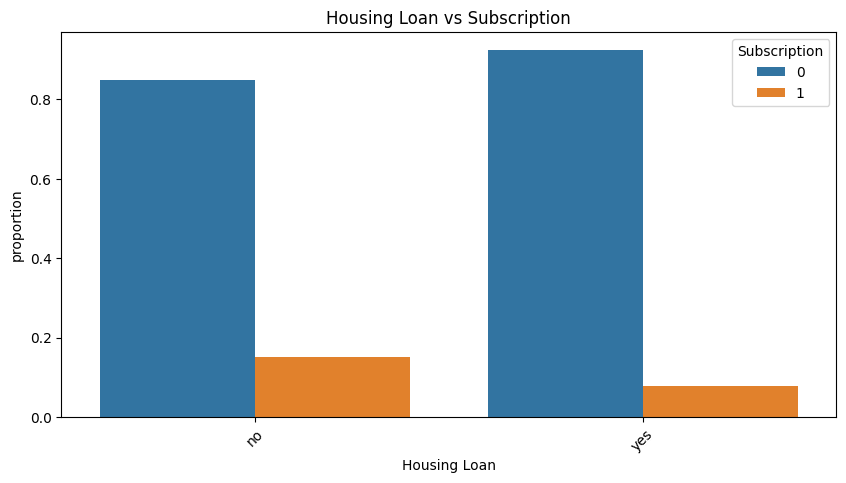

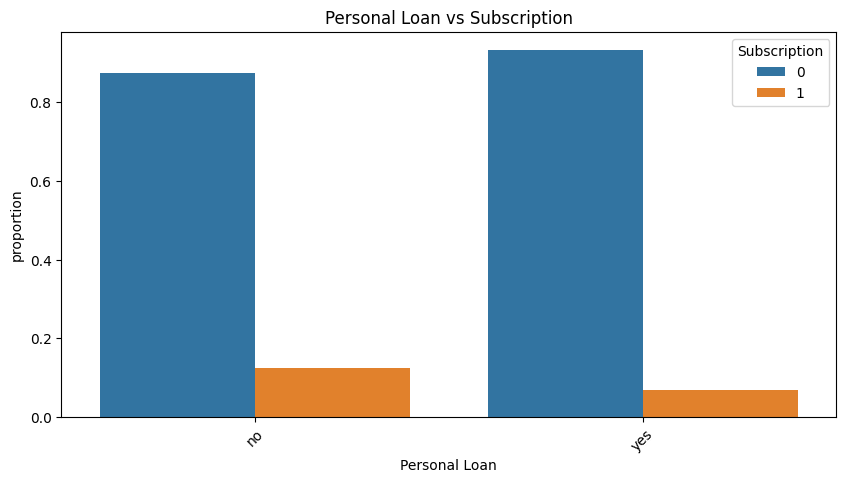

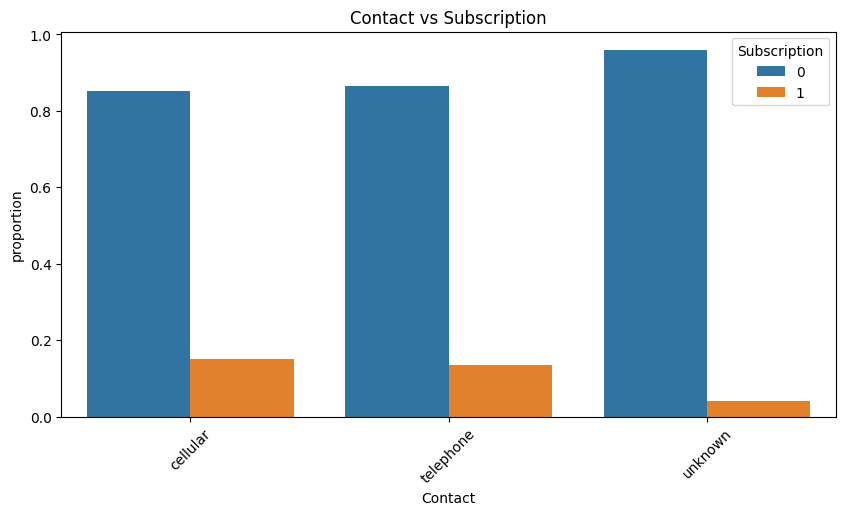

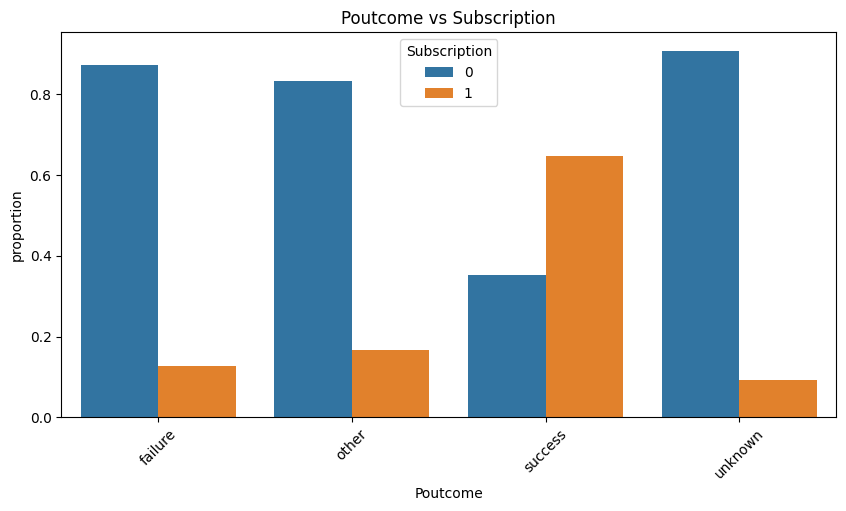

In [ ]:
#Variable Categorica vs Suscription
cat_vars = ['Job','Marital Status','Education','Credit','Housing Loan','Personal Loan','Contact','Poutcome']

for col in cat_vars:
    plt.figure(figsize=(10,5))
    prop = (df_eda.groupby(col)['Subscription']
                   .value_counts(normalize=True)
                   .rename('proportion')
                   .reset_index())
    sns.barplot(data=prop, x=col, y='proportion', hue='Subscription')
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.show()


Como conclusione se puede observar:

*Las personas con mayor proporcion de acceder a la campaña son los estudiantes y retirados

*Las personas con estudios terciarios tienen mayor proporcion de suscrpicion

*La Varibale Poutcome tiene alto impacto: “success” dispara la probabilidad de suscribirse.

*Aquellas que no tienen un prestamo personal tienen mayor proporcion en suscripciones, lo mismo para aquellos que no tienen seguro para el hogar.


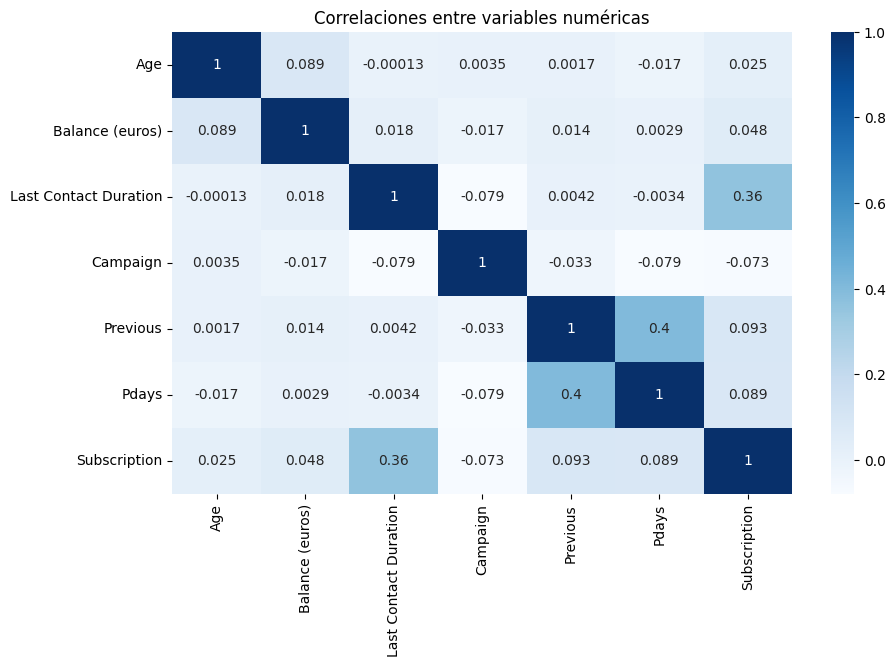

In [ ]:
#Correlaciones Numericas
num_vars = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Campaign', 'Previous', 'Pdays', 'Subscription']
plt.figure(figsize=(10,6))
sns.heatmap(df_eda[num_vars].corr(), annot=True, cmap='Blues')
plt.title('Correlaciones entre variables numéricas')
plt.show()


La variable más correlacionada con la suscripción suele ser duration, pero tiene un problema de data leakage (se utiliza solo después de saber si aceptó). Igual sirve como señal exploratoria.

*Pdays y Previous al final correlaciona poco

In [ ]:
# Feature Engineering preliminar
df_eda_2 = df_eda.copy()
#Agrupar categorías poco frecuentes de Education (unknown + primary)
df_eda_2['Education'] = df_eda_2['Education'].replace({
    'unknown': 'low_education',
    'primary': 'low_education'
})


#Crear Variable Binaria para aquellas personas contactadas por primera vez
df_eda_2['contact_first_time'] = (df_eda_2['Pdays'] == -1).astype(int)

#Deteccion de Outliers en Balance
Q1 = df_eda_2['Balance (euros)'].quantile(0.25)
Q3 = df_eda_2['Balance (euros)'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_eda_2['balance_outlier'] = (
    (df_eda_2['Balance (euros)'] < lower) |
    (df_eda_2['Balance (euros)'] > upper)
).astype(int)

#Crear variable Duración Log-transformada ya que es altamente asimetrica
df_eda_2['log_duration'] = np.log1p(df_eda_2['Last Contact Duration'])

df_eda_2.info()
df_eda_2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    45211 non-null  float64
 1   Job                    45211 non-null  object 
 2   Marital Status         45211 non-null  object 
 3   Education              45211 non-null  object 
 4   Credit                 45211 non-null  object 
 5   Balance (euros)        45211 non-null  float64
 6   Housing Loan           45211 non-null  object 
 7   Personal Loan          45211 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  45211 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  45211 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription,contact_first_time,balance_outlier,log_duration
0,58.0,blue-collar,married,secondary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0,1,0,5.568345
1,44.0,technician,single,secondary,no,448.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0,1,0,5.023881
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0,1,0,4.343805
3,47.0,blue-collar,married,low_education,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown,0,1,0,4.532599
4,33.0,unknown,single,low_education,no,1.0,no,no,unknown,5,may,180.0,1,-1.0,0,unknown,0,1,0,5.198497


---
**Modelado Dataset**

Ya con el Dataframe modificado, se modifica una vez mas generando las columnas dummies necesarias par su modelado

---

In [ ]:
#Preparo Dataset para modelado
X = df_eda_2.drop("Subscription", axis=1)
y = df_eda_2["Subscription"]

cat_cols = [
    "Job",
    "Marital Status",
    "Education",
    "Credit",
    "Housing Loan",
    "Personal Loan",
    "Contact",
    "Poutcome",
    "Last Contact Month"
]

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

num_cols = [
    "Age",
    "Balance (euros)",
    "Last Contact Day",
    "Last Contact Duration",
    "Campaign",
    "Pdays",
    "Previous",
    "log_duration"
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


---
**Modelado**

- Importacion de librerias de ML para el modelado
- Validacion resultados de 3 modelos (Log. Regression, Desicion Tree y Random Forest)

---

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7985
           1       0.37      0.81      0.51      1058

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.84      9043

AUC-ROC: 0.8859847090421193
=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      7985
           1       0.34      0.79      0.48      1058

    accuracy                           0.80      9043
   macro avg       0.65      0.79      0.68      9043
weighted avg       0.89      0.80      0.83      9043

AUC-ROC: 0.864049203788294
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.67      0.32      0.43      1058

    accuracy                           0.90      9043
 

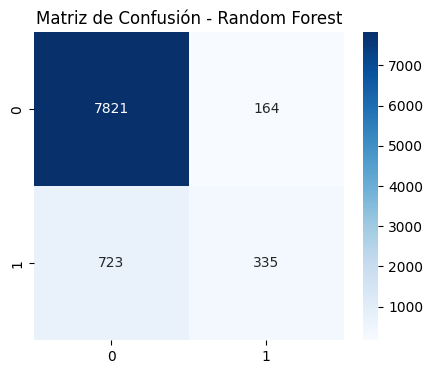

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# -------------------------------------------
# 1) Logistic Regression
# -------------------------------------------
logreg = LogisticRegression(max_iter=2000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))

# -------------------------------------------
# 2) Decision Tree
# -------------------------------------------
dt = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_dt))

# -------------------------------------------
# 3) Random Forest
# -------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

# -------------------------------------------
# Matriz de confusión del mejor modelo (RF)
# -------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


In [ ]:
#Cross-Validation (ROC-AUC, F1-score, Recall como métricas)
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": logreg,
    "Decision Tree": dt,
    "Random Forest": rf
}

scoring = {
    'roc_auc': 'roc_auc',
    'f1_score': make_scorer(f1_score),
    'recall_score': make_scorer(recall_score)
}

for name, model in models.items():
    results = cross_validate(model, X_encoded, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"{name}:")
    print(f"  AUC-ROC medio = {results['test_roc_auc'].mean():.4f} | std = {results['test_roc_auc'].std():.4f}")
    print(f"  F1-score medio = {results['test_f1_score'].mean():.4f} | std = {results['test_f1_score'].std():.4f}")
    print(f"  Recall medio = {results['test_recall_score'].mean():.4f} | std = {results['test_recall_score'].std():.4f}")


Logistic Regression:
  AUC-ROC medio = 0.8836 | std = 0.0064
  F1-score medio = 0.5034 | std = 0.0080
  Recall medio = 0.7954 | std = 0.0130
Decision Tree:
  AUC-ROC medio = 0.8580 | std = 0.0059
  F1-score medio = 0.4617 | std = 0.0062
  Recall medio = 0.7879 | std = 0.0085
Random Forest:
  AUC-ROC medio = 0.9081 | std = 0.0044
  F1-score medio = 0.4306 | std = 0.0054
  Recall medio = 0.3188 | std = 0.0057


---
Evaluacion de resultados de cada modelo usado


---

<Figure size 700x600 with 0 Axes>

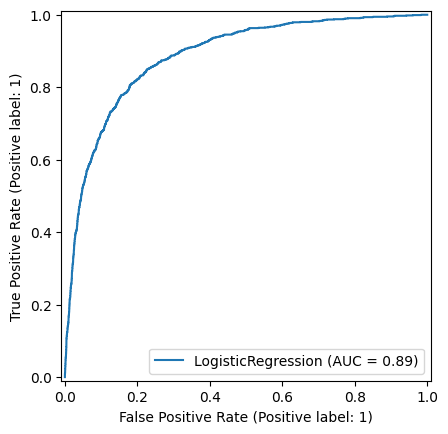

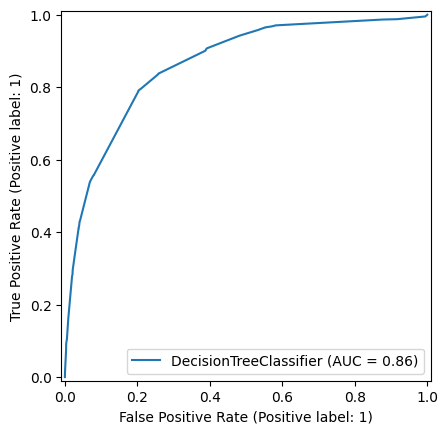

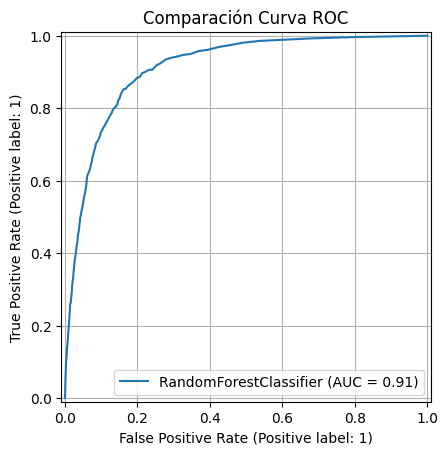

In [ ]:
#Curvas ROC de los 3 modelos en una misma gráfica
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(7,6))

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
RocCurveDisplay.from_estimator(dt, X_test, y_test)
RocCurveDisplay.from_estimator(rf, X_test, y_test)

plt.title("Comparación Curva ROC")
plt.grid(True)
plt.show()


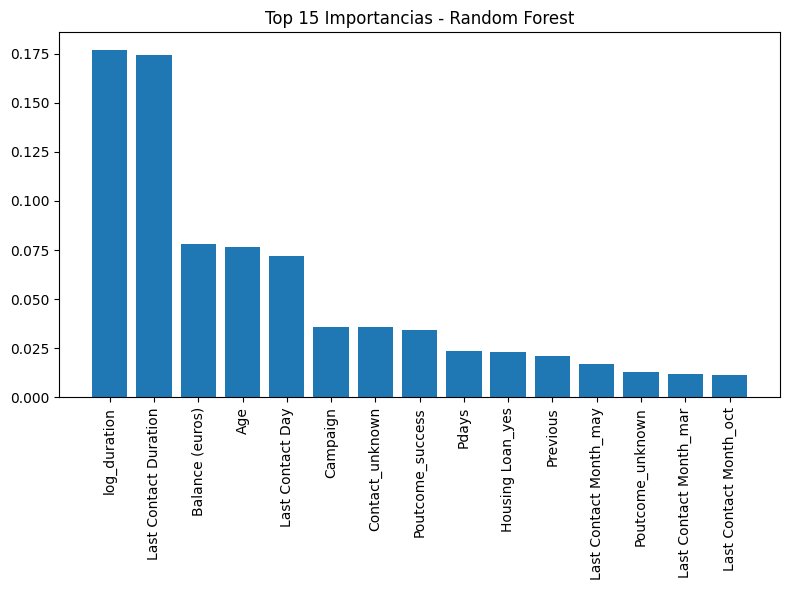

In [ ]:
#Importanica de variables para Random Forest

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_encoded.columns

plt.figure(figsize=(8,6))
plt.bar(range(15), importances[indices][:15])
plt.xticks(range(15), features[indices][:15], rotation=90)
plt.title("Top 15 Importancias - Random Forest")
plt.tight_layout()
plt.show()


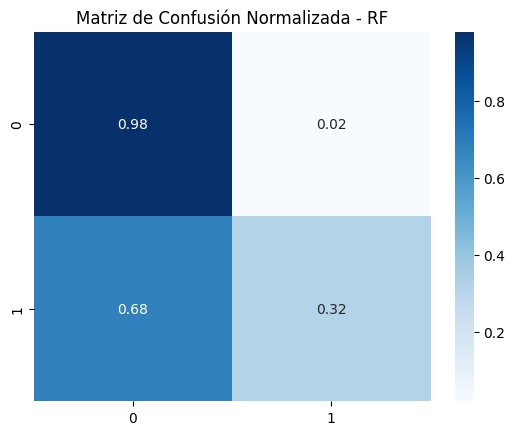

In [ ]:
#Matriz de confusion normalizada
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf, normalize="true"),
    annot=True, cmap="Blues", fmt=".2f"
)
plt.title("Matriz de Confusión Normalizada - RF")
plt.show()


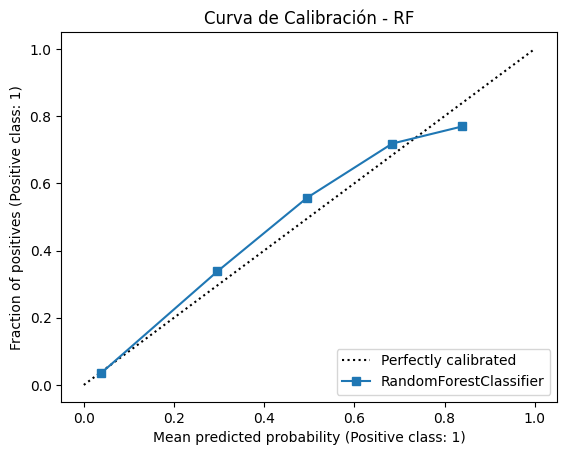

In [ ]:
#Curva de calibracion
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(rf, X_test, y_test)
plt.title("Curva de Calibración - RF")
plt.show()


El mejor modelo de los tres propuestos es el Random Forest debido a que presenta el AUC- ROC promedio mas alto con un bajo desvio estandard indicando que es estable.
Observando la matriz de confusion se puede concluir lo siguiente:

El 98% de los clientes que no se suscriben fueron detectados correctamente.

Solo el 2% de los clientes que no se suscriben fueron mal clasificados

El modelo está perdiendo el 68% de los clientes que sí se suscriben

El 32% de los que se suscrtiben fueron categorizado correctamente.

Por lo que el modelo predice muy bien la clase mayoritaria (0) pero falla en detectar la clase minoritaria (1) ya que el dataset es muy desbalanceado incluso aplicando class_weight= balanced

Si el objetivo del banco es detectar aquellos clientes que se sucriben se debe subir el reccall de la clase 1, ya que un 68% de clientes no se detectan. Para ello se porpone ajustar el umbral de decision de 0.5 a 0,3 o 0,25. Esto mejora el recall a costa de más falsos positivos (lo cual no es malo en marketing).


=== Random Forest con Umbral Ajustado a 0.25 ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7985
           1       0.51      0.71      0.59      1058

    accuracy                           0.88      9043
   macro avg       0.73      0.81      0.76      9043
weighted avg       0.91      0.88      0.89      9043

AUC-ROC: 0.9122172599143242


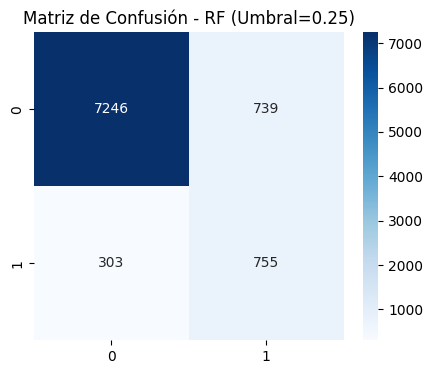

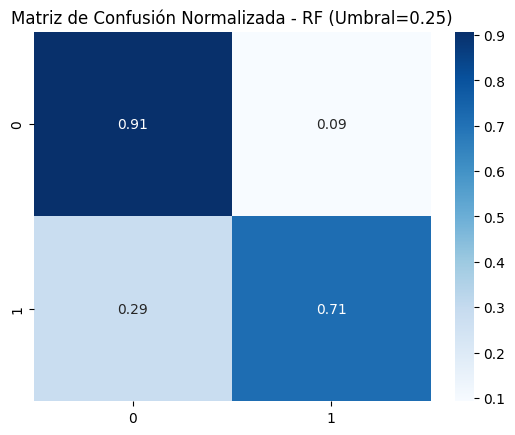

In [ ]:
# Ajustar el umbral de decisión para Random Forest
threshold = 0.25 # Se Puede probar con 0.3 tambien

# Obtener las probabilidades de la clase positiva (1)
y_proba_rf_adjusted = rf.predict_proba(X_test)[:, 1]

# Aplicar el nuevo umbral
y_pred_rf_adjusted = (y_proba_rf_adjusted >= threshold).astype(int)

print(f"=== Random Forest con Umbral Ajustado a {threshold} ===")
print(classification_report(y_test, y_pred_rf_adjusted))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf_adjusted))

# Matriz de confusión con el umbral ajustado
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_adjusted), annot=True, fmt='d', cmap="Blues")
plt.title(f"Matriz de Confusión - RF (Umbral={threshold})")
plt.show()

# Matriz de confusión normalizada
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf_adjusted, normalize="true"),
    annot=True, cmap="Blues", fmt=".2f"
)
plt.title(f"Matriz de Confusión Normalizada - RF (Umbral={threshold})")
plt.show()

Random Forest con umbral ajustado (0,25): Al cambiar el umbral de decisión de 0,5 a 0,25, hemos logrado una mejora significativa:

*Recall de suscriptores (clase 1): Aumento de 0,32 a 0,71. Esto significa que el modelo ahora identifica mucho mejor a los suscriptores reales, capturando casi el doble de la cantidad anterior.

*Precisión de suscriptores (clase 1): Disminución de 0,67 a 0,54. Esta es una contrapartida esperada; al ser más agresivos en la identificación de suscriptores, también generamos más falsos positivos.

*f1 score de suscriptores (clase 1): Mejora de 0,43 a 0,59, lo que muestra un mejor equilibrio entre precisión y recordatorio para la clase minoritaria.

*Precisión general: Se mantuvo estable en 0,90.

*AUC-ROC: Se mantiene en 0,9122, ya que el AUC-ROC es una métrica independiente del umbral de clasificación.

Este ajuste se alinea con nuestro objetivo: hemos mejorado la capacidad del modelo para detectar la clase minoritaria (suscriptores) a costa de una menor precisión, lo cual suele ser aceptable en campañas de marketing donde la identificación de clientes potenciales es una prioridad.

Mejor Umbral (Max F1): 0.2650
F1-Score en ese umbral: 0.5980
Precisión en ese umbral: 0.5207
Recall en ese umbral: 0.7023


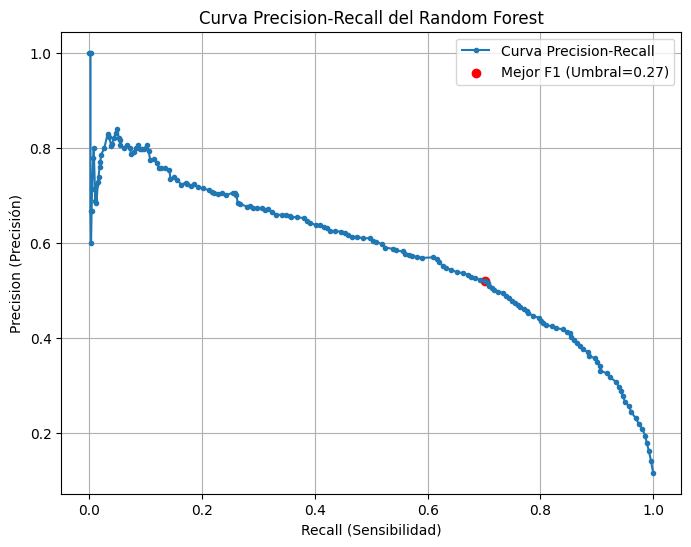


=== Reporte de Clasificación con el Umbral Óptimo (0.2650) ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7985
           1       0.52      0.70      0.60      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.81      0.77      9043
weighted avg       0.91      0.89      0.90      9043



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# 1. Obtener la Precisión, el Recall y los Umbrales
# Usamos las probabilidades originales del Random Forest: y_proba_rf
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Los 'thresholds' tienen un elemento menos que 'precision' y 'recall',
# ya que no hay umbral para el último par (Precision=1, Recall=0).

# 2. Calcular el F1-Score para cada umbral
# Evitar división por cero
fscore = 2 * (precision * recall) / (precision + recall + 1e-10)

# 3. Encontrar el mejor Umbral (el que maximiza el F1-Score)
ix = np.argmax(fscore)
best_f1 = fscore[ix]
best_threshold = thresholds[ix]

print(f'Mejor Umbral (Max F1): {best_threshold:.4f}')
print(f'F1-Score en ese umbral: {best_f1:.4f}')
print(f'Precisión en ese umbral: {precision[ix]:.4f}')
print(f'Recall en ese umbral: {recall[ix]:.4f}')

# 4. Visualizar la Curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.scatter(recall[ix], precision[ix], marker='o', color='red',
            label=f'Mejor F1 (Umbral={best_threshold:.2f})')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precision (Precisión)')
plt.title('Curva Precision-Recall del Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# 5. Aplicar el Mejor Umbral y obtener el reporte final
y_pred_best_threshold = (y_proba_rf >= best_threshold).astype(int)

print(f"\n=== Reporte de Clasificación con el Umbral Óptimo ({best_threshold:.4f}) ===")
print(classification_report(y_test, y_pred_best_threshold))

Acá se puede concluir que efectivamente el threshold se encuentra entre 0,3 y 0,25 como se habia planteado anteriormente, dándonos 0,265 como el mas optimo aunque el f1 score y el recall no varian muchos con threshold = 0,25 que fue el elegido .

/tmp/ipython-input-4199206907.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")


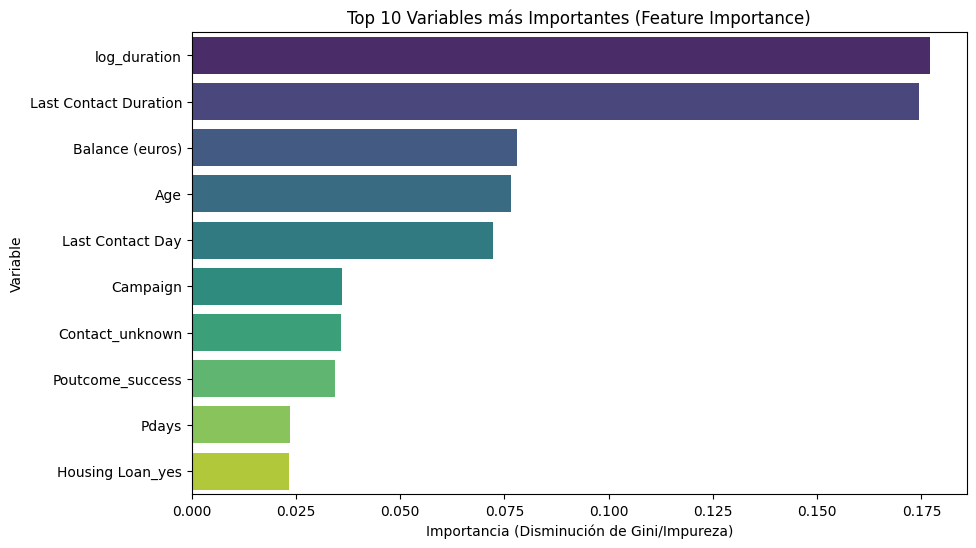


--- Top 10 Variables Más Importantes ---
log_duration             0.177024
Last Contact Duration    0.174450
Balance (euros)          0.077900
Age                      0.076625
Last Contact Day         0.072240
Campaign                 0.036020
Contact_unknown          0.035830
Poutcome_success         0.034412
Pdays                    0.023523
Housing Loan_yes         0.023204
dtype: float64


In [ ]:

# 1. Obtener las importancias de las features
importances = rf.feature_importances_

# 2. Mapear las importancias a los nombres de las variables
feature_importances = pd.Series(importances, index=X_train.columns)

# 3. Seleccionar las 10 más importantes
top_10_features = feature_importances.nlargest(10)

# 4. Visualizar las 10 variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.title('Top 10 Variables más Importantes (Feature Importance)')
plt.xlabel('Importancia (Disminución de Gini/Impureza)')
plt.ylabel('Variable')
plt.show()

# Imprimir las 10 más importantes con sus valores
print("\n--- Top 10 Variables Más Importantes ---")
print(top_10_features)

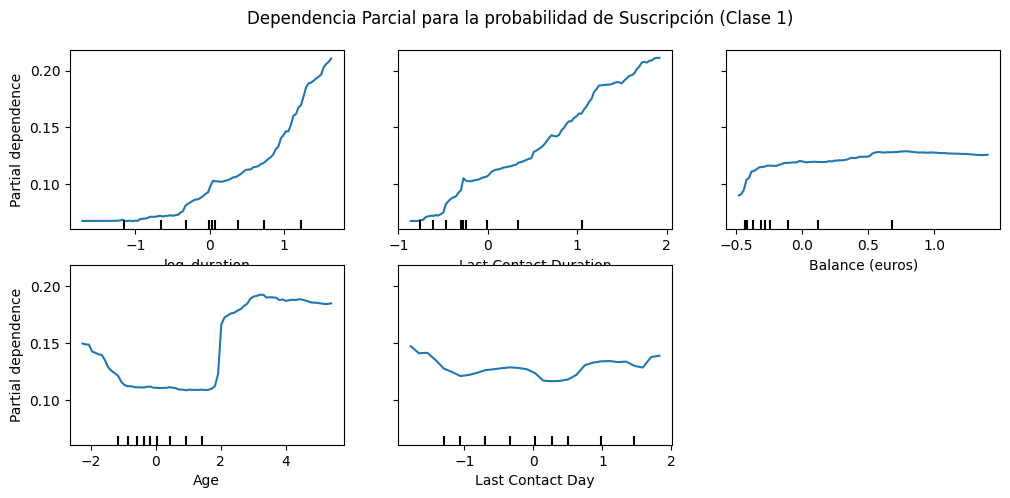

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Seleccionamos las 5 variables más importantes para la visualización
features_to_plot = top_10_features.index[:5]

fig, ax = plt.subplots(figsize=(12, 5))
# Graficamos la dependencia parcial
PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    features=features_to_plot,
    target=1, # Para la clase minoritaria (suscripción)
    ax=ax
)
fig.suptitle(f"Dependencia Parcial para la probabilidad de Suscripción (Clase 1)")
plt.subplots_adjust(top=0.9)
plt.show()

Este grafico indica la probabilidad de suscribirse en funcion de las 5 variables mas importantes.

Nota: Los valores de las features (eje x) se encuentran normalizados



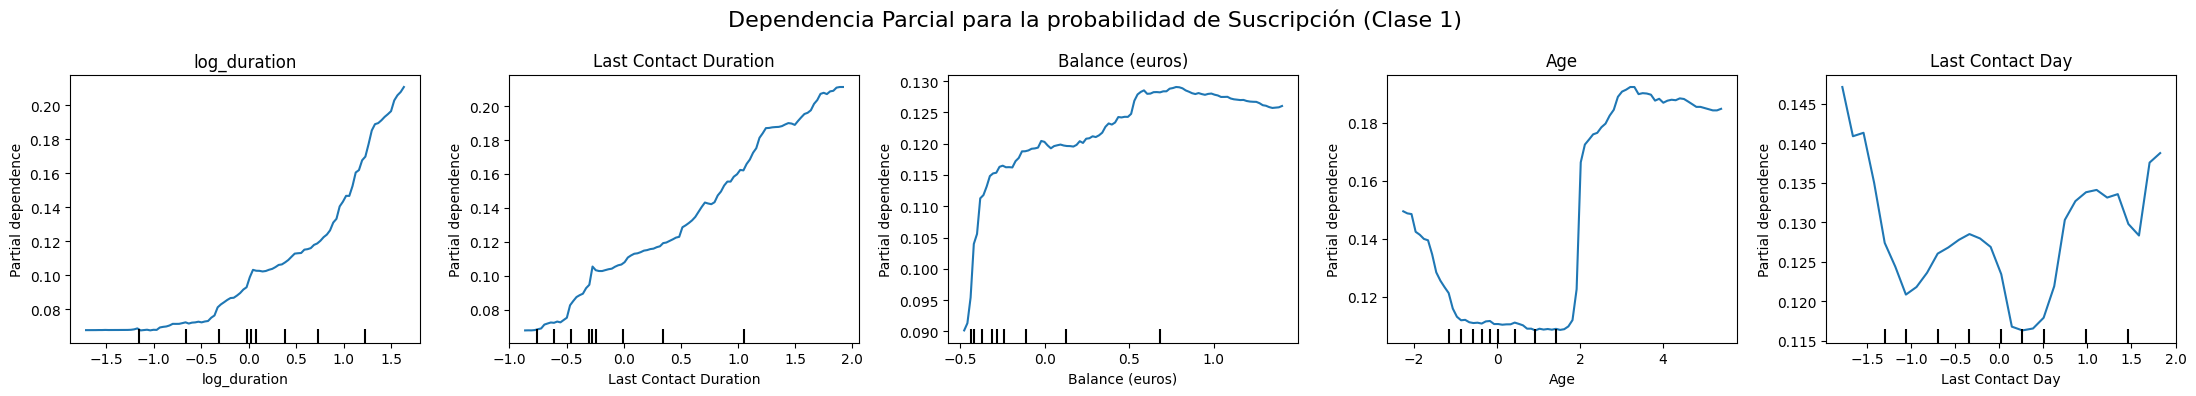

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Variables a graficar
features_to_plot = [
    "log_duration",
    "Last Contact Duration",
    "Balance (euros)",
    "Age",
    "Last Contact Day"
]

# Diccionario con los rangos deseados (min, max)
custom_ranges = {
    "log_duration": (4, 6),
    "Last Contact Duration": (50, 2000),
    "Balance (euros)": (-200, 2000),
    "Age": (30, 60),
    "Last Contact Day": (5, 17)
}

fig, ax = plt.subplots(ncols=5, figsize=(22, 4))

# Graficamos cada variable por separado para poder controlar ejes
for i, feature in enumerate(features_to_plot):
    disp = PartialDependenceDisplay.from_estimator(
        rf,
        X_train,
        features=[feature],
        target=1,
        ax=ax[i]
    )

    # Aplicar el rango en el eje X
    xmin, xmax = custom_ranges[feature]
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_title(feature)

fig.suptitle("Dependencia Parcial para la probabilidad de Suscripción (Clase 1)", fontsize=16)
plt.tight_layout()
plt.show()